In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Stock Prediction/GOOG.csv',index_col='Date',parse_dates=True)


In [ ]:
df.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,3793600
2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,2668900
2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,2072500


In [ ]:
print(df.head())


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


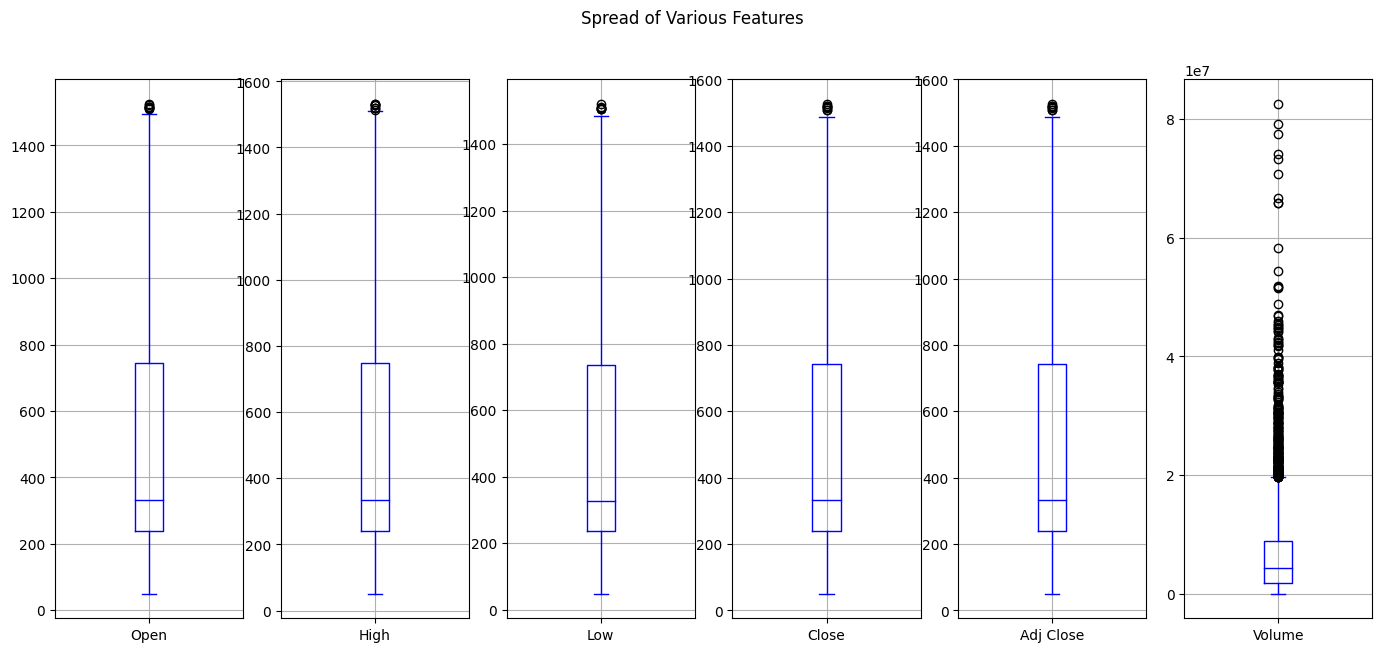

In [ ]:
pd.__version__

# plt.style.use('classic')

ax = df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False , title="Spread of Various Features", figsize=(17,7), grid=True, color= "blue")
#ax = df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False ,figsize=(15,7), grid=True)

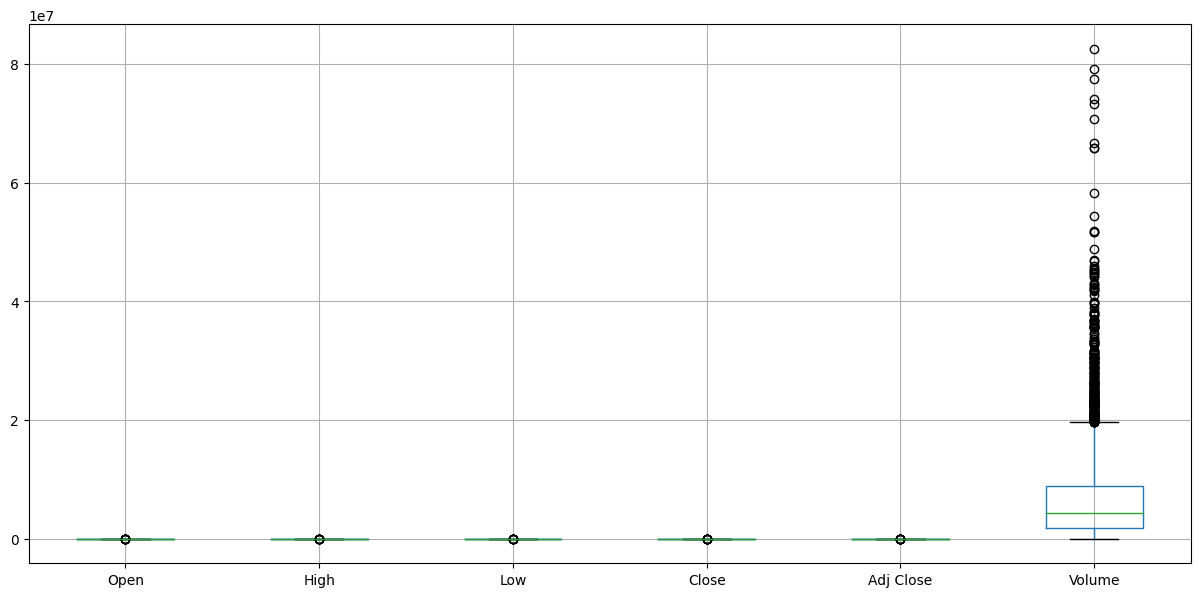

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(15,7))
plt.show()

ValueError: Dimensions of labels and X must be compatible

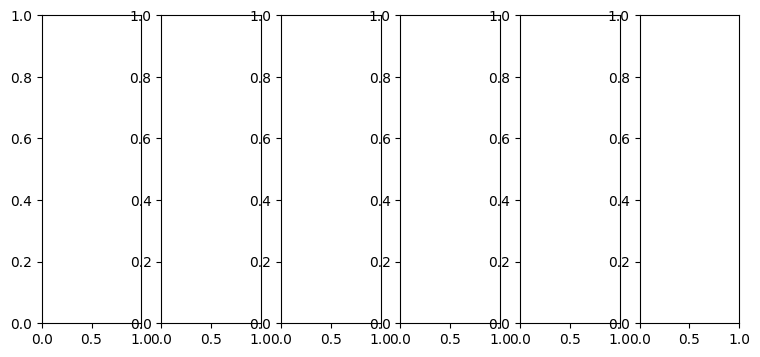

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(df,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

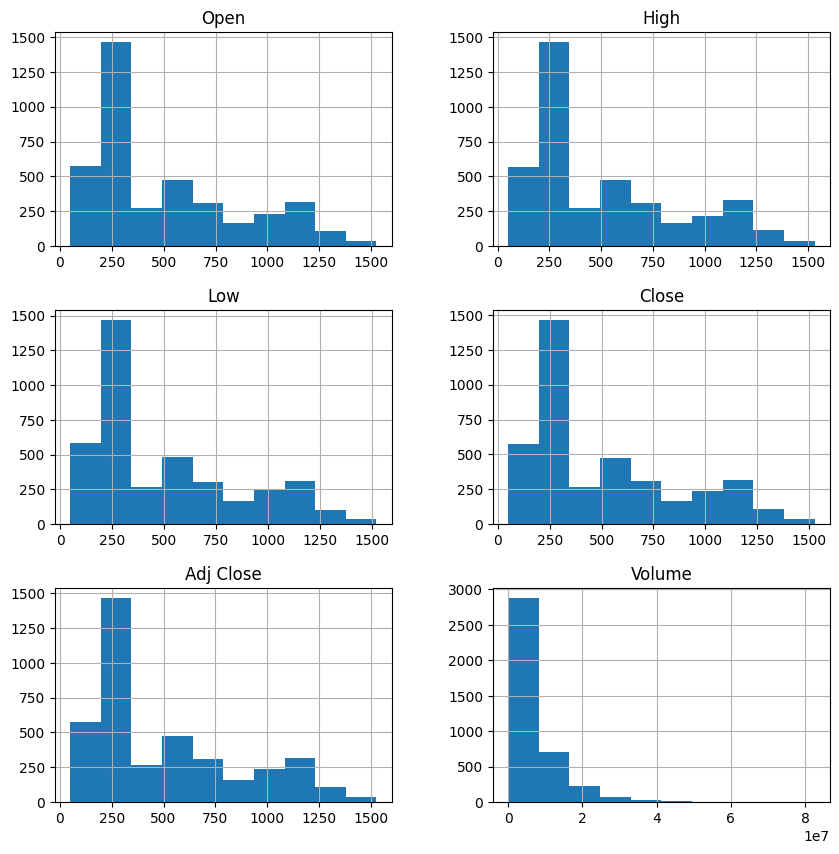

In [ ]:
df.hist(figsize = (10,10))

In [ ]:
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [ ]:
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [ ]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [ ]:
print(df.tail())

                  Close  HL_Change  OC_Change   Volume
Date                                                  
2020-04-29  1341.479980   2.614425   0.001492  3793600
2020-04-30  1348.660034   2.293398   1.794882  2668900
2020-05-01  1320.609985   3.132719  -0.593904  2072500
2020-05-04  1326.800049   2.206315   1.419480  1504000
2020-05-05  1351.109985   2.727557   0.985854  1650700


In [ ]:
Close1 = df['Close'][-41:-1]
print(Close1)
len(Close1)
Close2 = Close1.to_numpy()
print(Close2)

Date
2020-03-09    1215.560059
2020-03-10    1280.390015
2020-03-11    1215.410034
2020-03-12    1114.910034
2020-03-13    1219.729980
2020-03-16    1084.329956
2020-03-17    1119.800049
2020-03-18    1096.800049
2020-03-19    1115.290039
2020-03-20    1072.319946
2020-03-23    1056.619995
2020-03-24    1134.459961
2020-03-25    1102.489990
2020-03-26    1161.750000
2020-03-27    1110.709961
2020-03-30    1146.819946
2020-03-31    1162.810059
2020-04-01    1105.619995
2020-04-02    1120.839966
2020-04-03    1097.880005
2020-04-06    1186.920044
2020-04-07    1186.510010
2020-04-08    1210.280029
2020-04-09    1211.449951
2020-04-13    1217.560059
2020-04-14    1269.229980
2020-04-15    1262.469971
2020-04-16    1263.469971
2020-04-17    1283.250000
2020-04-20    1266.609985
2020-04-21    1216.339966
2020-04-22    1263.209961
2020-04-23    1276.310059
2020-04-24    1279.310059
2020-04-27    1275.880005
2020-04-28    1233.670044
2020-04-29    1341.479980
2020-04-30    1348.660034
2020-05

In [ ]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    71.785927
2004-08-20    74.301498
2004-08-23    73.693779
2004-08-24    69.982689
2004-08-25    74.411087
                ...    
2020-04-29          NaN
2020-04-30          NaN
2020-05-01          NaN
2020-05-04          NaN
2020-05-05          NaN
Name: label, Length: 3955, dtype: float64


<ipython-input-19-2da30fa1ae7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[forecast_Col].shift(-forecast_out)


In [ ]:
df.tail()

,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-04-29,1341.479980,2.614425,0.001492,3793600,NaN
2020-04-30,1348.660034,2.293398,1.794882,2668900,NaN
2020-05-01,1320.609985,3.132719,-0.593904,2072500,NaN
2020-05-04,1326.800049,2.206315,1.419480,1504000,NaN
2020-05-05,1351.109985,2.727557,0.985854,1650700,NaN


In [ ]:
df.dropna(inplace=True)
df.tail()

<ipython-input-21-0a18aee3a3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-03-03,1341.390015,5.867119,-4.146720,2402300,1341.479980
2020-03-04,1386.520020,3.348942,2.007757,1913300,1348.660034
2020-03-05,1319.040039,4.123060,-2.307800,2561300,1320.609985
2020-03-06,1298.410034,3.581929,1.671807,2660600,1326.800049
2020-03-09,1215.560059,4.563334,0.851241,3365400,1351.109985


In [ ]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [ ]:
print(len(X),len(Y))

3915 3915


In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [ ]:
a = np.shape(X_train)
b = np.shape(Y_train)
c = np.shape(X_test)
d = np.shape(Y_test)
print(a,b,c,d)

(3132, 4) (3132,) (783, 4) (783,)


In [ ]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.034601449966430664


In [ ]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.9722589182196745


In [ ]:
len(Y_test)

783

In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[1307.87891209 1307.56536749 1319.47680707 1342.4060696  1329.02785046
 1324.2962958  1310.97713454 1309.8731622  1304.00888496 1315.76883734
 1322.94492172 1322.58351419 1315.13521849 1297.75051721 1303.64576029
 1328.32876189 1336.99526298 1349.51117469 1351.27426226 1353.32427456
 1354.45253998 1358.62689415 1356.71082567 1369.69573958 1363.35432243
 1361.47697224 1364.86985077 1356.95991689 1357.73833212 1353.40516473
 1368.78842297 1360.50094365 1344.51318683 1346.32406883 1374.16330284
 1367.71551726 1398.39413756 1401.52470135 1411.45608794 1427.30841033]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1215.560059  1307.878912
1   2020-03-04  1280.390015  1307.565367
2   2020-03-05  1215.410034  1319.476807
3   2020-03-06  1114.910034  1342.406070
4   2020-03-09  1219.729980  1329.027850
5   2020-03-10  1084.329956  1324.296296
6   2020-03-11  1119.800049  1310.977135
7   2020-03-12  1096.800049  1309.873162
8   2020-03-13  1115.290039  1304.008885
9   2020-03-16  1072.319946  1315.768837
10  2020-03-17  1056.619995  1322.944922
11  2020-03-18  1134.459961  1322.583514
12  2020-03-19  1102.489990  1315.135218
13  2020-03-20  1161.750000  1297.750517
14  2020-03-23  1110.709961  1303.645760
15  2020-03-24  1146.819946  1328.328762
16  2020-03-25  1162.810059  1336.995263
17  2020-03-26  1105.619995  1349.511175
18  2020-03-27  1120.839966  1351.274262
19  2020-03-30  1097.880005  1353.324275
20  2020-03-31  1186.920044  1354.452540
21  2020-04-01  1186.510010  1358.626894
22  2020-04-02  1210.280029  1356.710826
23  2020-04-03  

<ipython-input-31-5be22f1e5232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-31-5be22f1e5232>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
<ipython-input-31-5be22f1e5232>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range

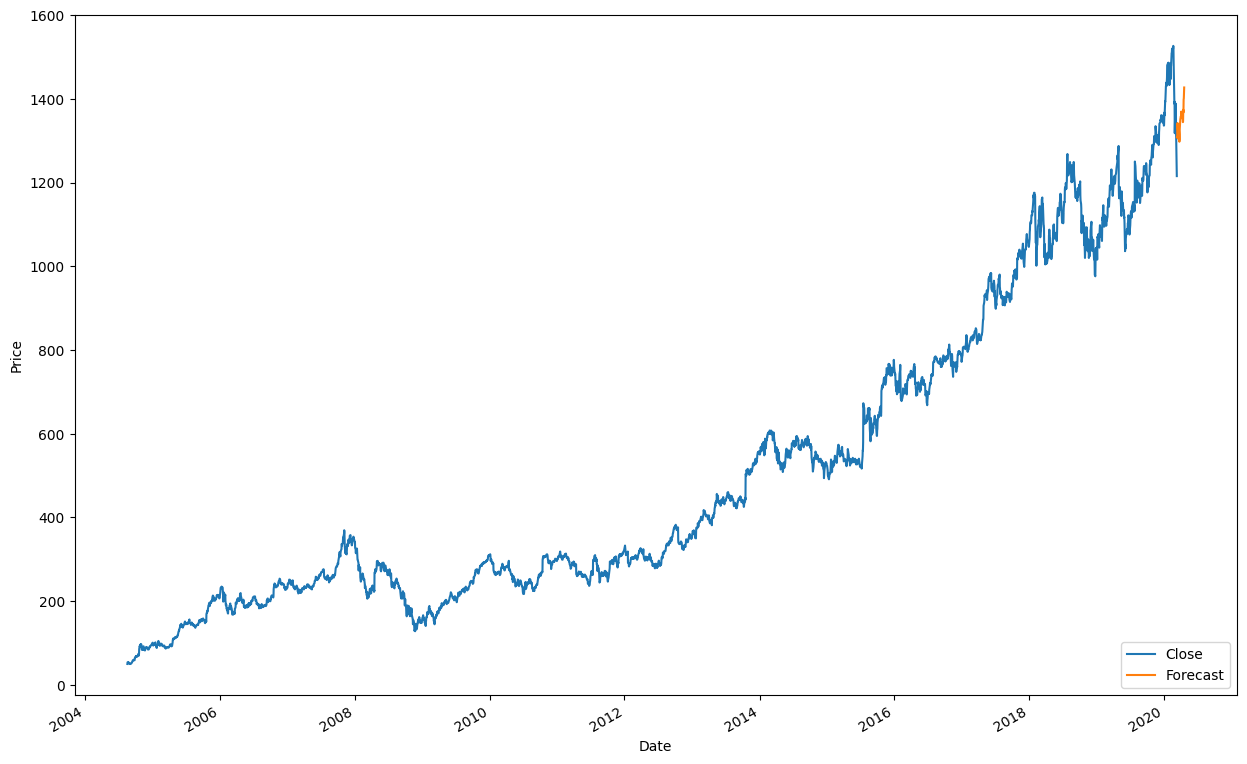

In [ ]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
startdt = time.time()

tree = DecisionTreeRegressor( max_depth=5)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.015582084655761719
Accuracy:- 0.9840157953295777


In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[1205.89146607 1205.89146607 1205.89146607 1205.89146607 1205.89146607
 1205.89146607 1258.32851393 1258.32851393 1205.89146607 1205.89146607
 1205.89146607 1156.10619467 1156.10619467 1205.89146607 1205.89146607
 1156.10619467 1156.10619467 1205.89146607 1205.89146607 1205.89146607
 1258.32851393 1258.32851393 1258.32851393 1258.32851393 1258.32851393
 1258.32851393 1258.32851393 1258.32851393 1258.32851393 1413.1765791
 1258.32851393 1258.32851393 1258.32851393 1258.32851393 1413.1765791
 1413.1765791  1413.1765791  1413.1765791  1413.1765791  1413.1765791 ]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1215.560059  1205.891466
1   2020-03-04  1280.390015  1205.891466
2   2020-03-05  1215.410034  1205.891466
3   2020-03-06  1114.910034  1205.891466
4   2020-03-09  1219.729980  1205.891466
5   2020-03-10  1084.329956  1205.891466
6   2020-03-11  1119.800049  1258.328514
7   2020-03-12  1096.800049  1258.328514
8   2020-03-13  1115.290039  1205.891466
9   2020-03-16  1072.319946  1205.891466
10  2020-03-17  1056.619995  1205.891466
11  2020-03-18  1134.459961  1156.106195
12  2020-03-19  1102.489990  1156.106195
13  2020-03-20  1161.750000  1205.891466
14  2020-03-23  1110.709961  1205.891466
15  2020-03-24  1146.819946  1156.106195
16  2020-03-25  1162.810059  1156.106195
17  2020-03-26  1105.619995  1205.891466
18  2020-03-27  1120.839966  1205.891466
19  2020-03-30  1097.880005  1205.891466
20  2020-03-31  1186.920044  1258.328514
21  2020-04-01  1186.510010  1258.328514
22  2020-04-02  1210.280029  1258.328514
23  2020-04-03  

In [ ]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.006130218505859375
Accuracy:- 0.686547448866132


In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[ 848.60845485 1159.55614769  867.92083262  754.97544515  306.87359031
  731.57061069  856.82673069  831.04526223  744.44297908  834.36976038
  702.92944815  734.05270162  772.48892908 1060.85252031  999.63000969
 1176.62845554  906.51093     885.21900346  841.097074    961.34598015
 1003.05589892  969.20003792  903.11777423 1064.24076477  720.01691854
  911.04212831 1032.09306454 1019.68030246 1071.43071108  907.23796885
  881.55026008  973.61769462  922.96768892 1011.03461162  974.128756
 1040.80538715  964.39231054  831.04526223  848.60845485 1018.48088192]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28']

cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1215.560059   848.608455
1   2020-03-04  1280.390015  1159.556148
2   2020-03-05  1215.410034   867.920833
3   2020-03-06  1114.910034   754.975445
4   2020-03-09  1219.729980   306.873590
5   2020-03-10  1084.329956   731.570611
6   2020-03-11  1119.800049   856.826731
7   2020-03-12  1096.800049   831.045262
8   2020-03-13  1115.290039   744.442979
9   2020-03-16  1072.319946   834.369760
10  2020-03-17  1056.619995   702.929448
11  2020-03-18  1134.459961   734.052702
12  2020-03-19  1102.489990   772.488929
13  2020-03-20  1161.750000  1060.852520
14  2020-03-23  1110.709961   999.630010
15  2020-03-24  1146.819946  1176.628456
16  2020-03-25  1162.810059   906.510930
17  2020-03-26  1105.619995   885.219003
18  2020-03-27  1120.839966   841.097074
19  2020-03-30  1097.880005   961.345980
20  2020-03-31  1186.920044  1003.055899
21  2020-04-01  1186.510010   969.200038
22  2020-04-02  1210.280029   903.117774
23  2020-04-03  

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
dfl = pd.read_csv('/content/drive/My Drive/Stock Prediction/GOOG.csv',index_col="Date",parse_dates=True)
#Show the data
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,1341.479980,3793600
2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,1348.660034,2668900
2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500


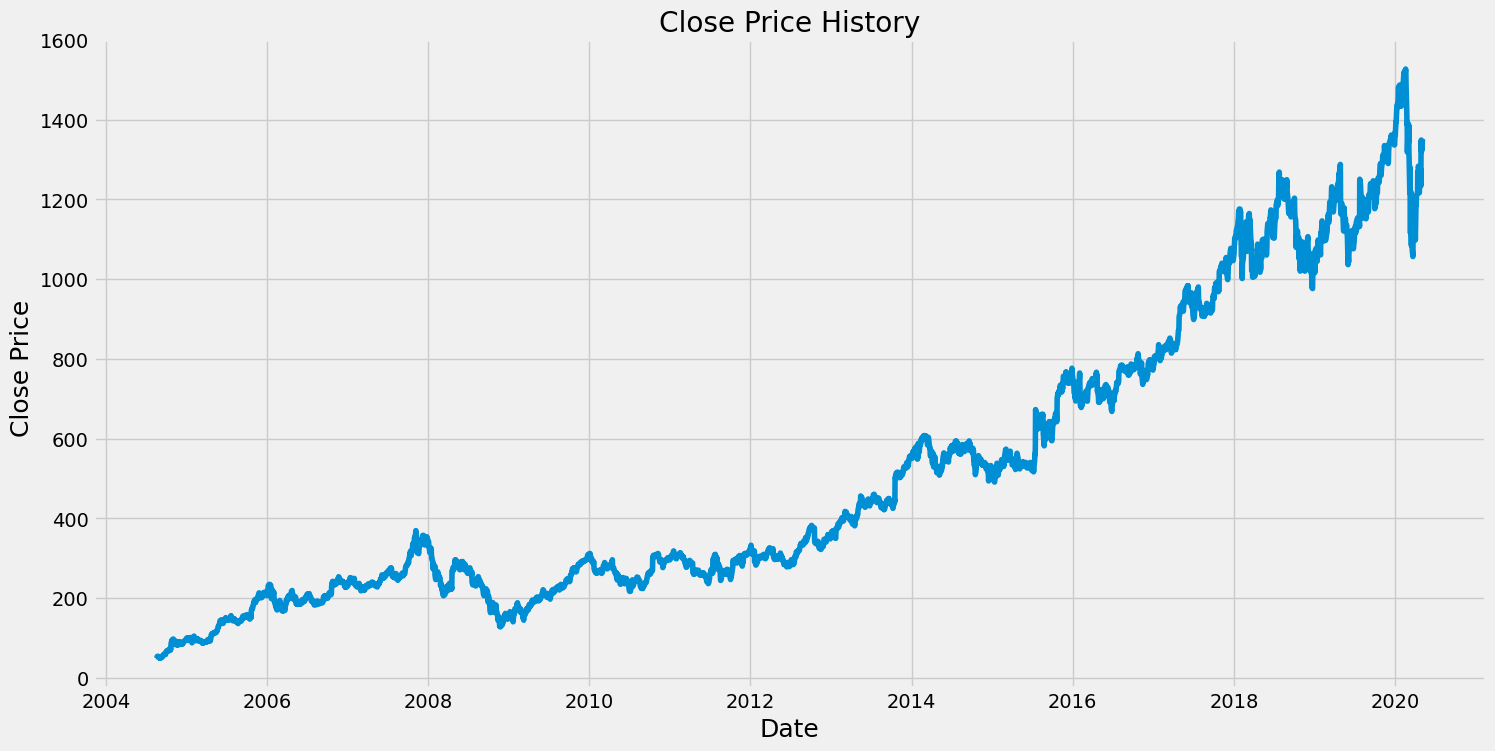

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = dfl.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3164

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.11307572e-04],
       [2.79949983e-03],
       [3.16714518e-03],
       ...,
       [8.60461840e-01],
       [8.64653175e-01],
       [8.81113600e-01]])

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([1.11307572e-04, 2.79949983e-03, 3.16714518e-03, 1.63922502e-03,
       2.02036376e-03, 2.66458425e-03, 2.07095583e-03, 6.74577906e-04,
       7.96002809e-04, 8.09494841e-05, 5.05934276e-04, 0.00000000e+00,
       5.29544993e-04, 7.72392091e-04, 7.75765438e-04, 1.79437797e-03,
       2.52629803e-03, 3.87208117e-03, 4.04409815e-03, 4.70855872e-03,
       5.89581557e-03, 6.52654809e-03, 6.01386712e-03, 6.19600414e-03,
       7.01898898e-03, 6.68507168e-03, 6.15552940e-03, 9.05621676e-03,
       1.04795767e-02, 9.98038914e-03, 1.09855110e-02, 1.18219858e-02,
       1.29384126e-02, 1.25033138e-02, 1.31003129e-02, 1.27225495e-02,
       1.18894426e-02, 1.26112453e-02, 1.37917548e-02, 1.41627762e-02,
       1.48744535e-02, 1.65777640e-02, 1.61662732e-02, 1.36534686e-02,
       1.66519674e-02, 2.44264845e-02, 2.94757025e-02, 2.75868836e-02,
       2.89933816e-02, 3.14657108e-02, 3.05685205e-02, 3.23865099e-02,
       3.19952538e-02, 3.09159285e-02, 2.85650235e-02, 2.33876346e-02,
     

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [ ]:
#Reshape the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(3104, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=200, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start

Epoch 1/200
97/97 [==============================] - 18s 56ms/step - loss: 0.0033
Epoch 2/200
97/97 [==============================] - 5s 53ms/step - loss: 1.2181e-04
Epoch 3/200
97/97 [==============================] - 5s 49ms/step - loss: 1.1656e-04
Epoch 4/200
97/97 [==============================] - 4s 43ms/step - loss: 1.1377e-04
Epoch 5/200
97/97 [==============================] - 7s 73ms/step - loss: 1.0586e-04
Epoch 6/200
97/97 [==============================] - 6s 61ms/step - loss: 1.0627e-04
Epoch 7/200
97/97 [==============================] - 4s 43ms/step - loss: 9.9387e-05
Epoch 8/200
97/97 [==============================] - 8s 81ms/step - loss: 9.8739e-05
Epoch 9/200
97/97 [==============================] - 6s 65ms/step - loss: 9.3126e-05
Epoch 10/200
97/97 [==============================] - 9s 91ms/step - loss: 8.5966e-05
Epoch 11/200
97/97 [==============================] - 4s 45ms/step - loss: 7.9614e-05
Epoch 12/200
97/97 [==============================] - 8s 80ms/step

In [ ]:
model.save("test_123.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
from keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('test_123.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_testl = np.array(x_testl)

In [ ]:
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

25/25 [==============================] - 1s 17ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

24.81909319850702

In [ ]:
from sklearn.metrics import mean_squared_error
rr = mean_squared_error(y_testl, predictionsl)
#mse = sklearn.metrics.mean_squared_error(y_testl, predictionsl)

rmse1 = math.sqrt(rr)

print(rmse1)

24.81909319850702


<ipython-input-59-a95e169fed25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictionsl


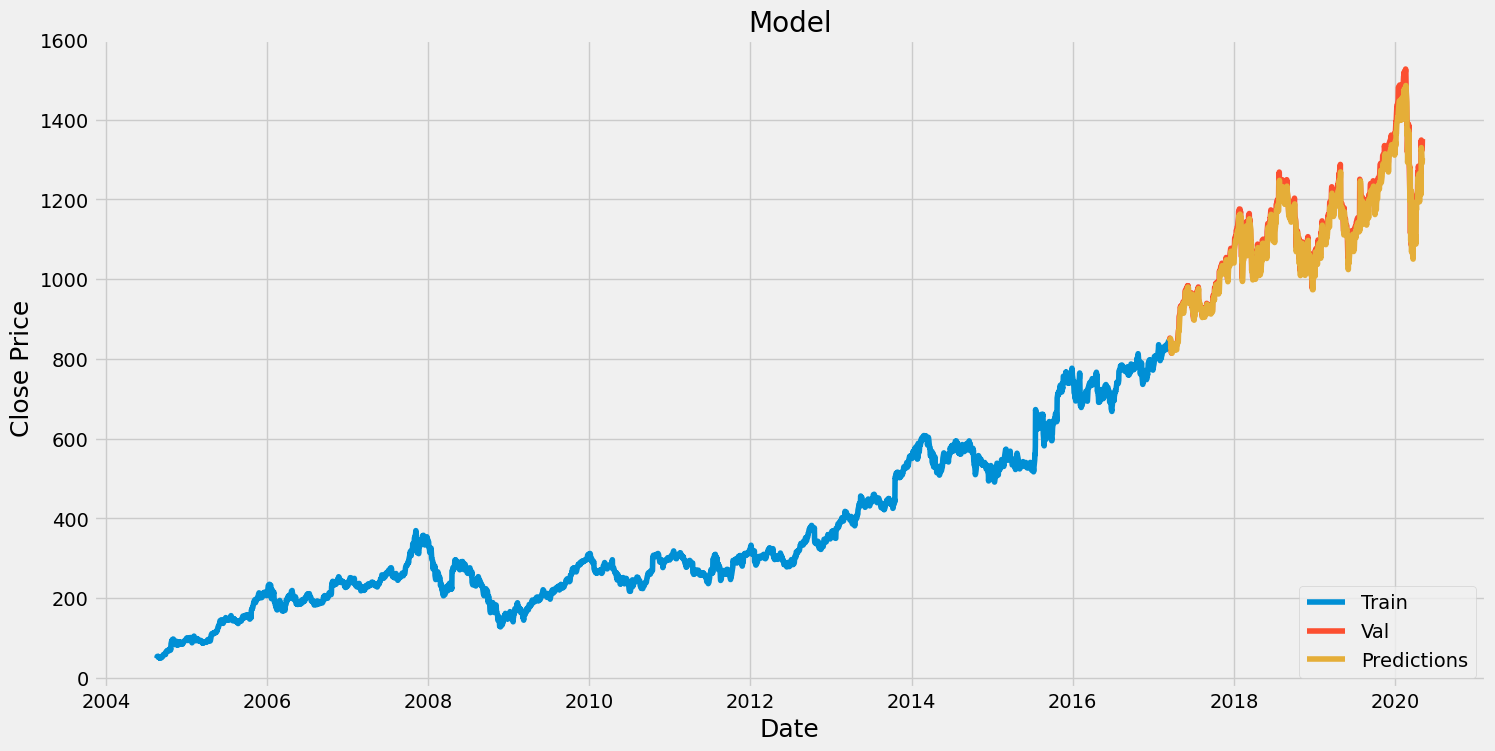

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-03-15,847.200012,844.072021
2017-03-16,848.780029,845.810242
2017-03-17,852.119995,847.458923
2017-03-20,848.400024,850.902527
2017-03-21,830.460022,846.620544
...,...,...
2020-04-29,1341.479980,1212.271484
2020-04-30,1348.660034,1329.775879
2020-05-01,1320.609985,1325.613159


In [ ]:
valid.tail(10)

,Close,Predictions
Date,,
2020-04-22,1263.209961,1193.935181
2020-04-23,1276.310059,1250.950806
2020-04-24,1279.310059,1260.464600
2020-04-27,1275.880005,1259.340210
2020-04-28,1233.670044,1255.674072
2020-04-29,1341.479980,1212.271484
2020-04-30,1348.660034,1329.775879
2020-05-01,1320.609985,1325.613159
2020-05-04,1326.800049,1290.850586


In [ ]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [ ]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [ ]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [ ]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

In [ ]:
days = [int(i) for i in range(30)]

predictions = {'Original':original[:30],
               'Linear Regression':lr.predict(X_old)[:30],
              'KNN':knn.predict(X_old)[:30],
              'Decision Tree':tree.predict(X_old)[:30],
              'LSTM':lstm[:30]}

predictions = pd.DataFrame(predictions)

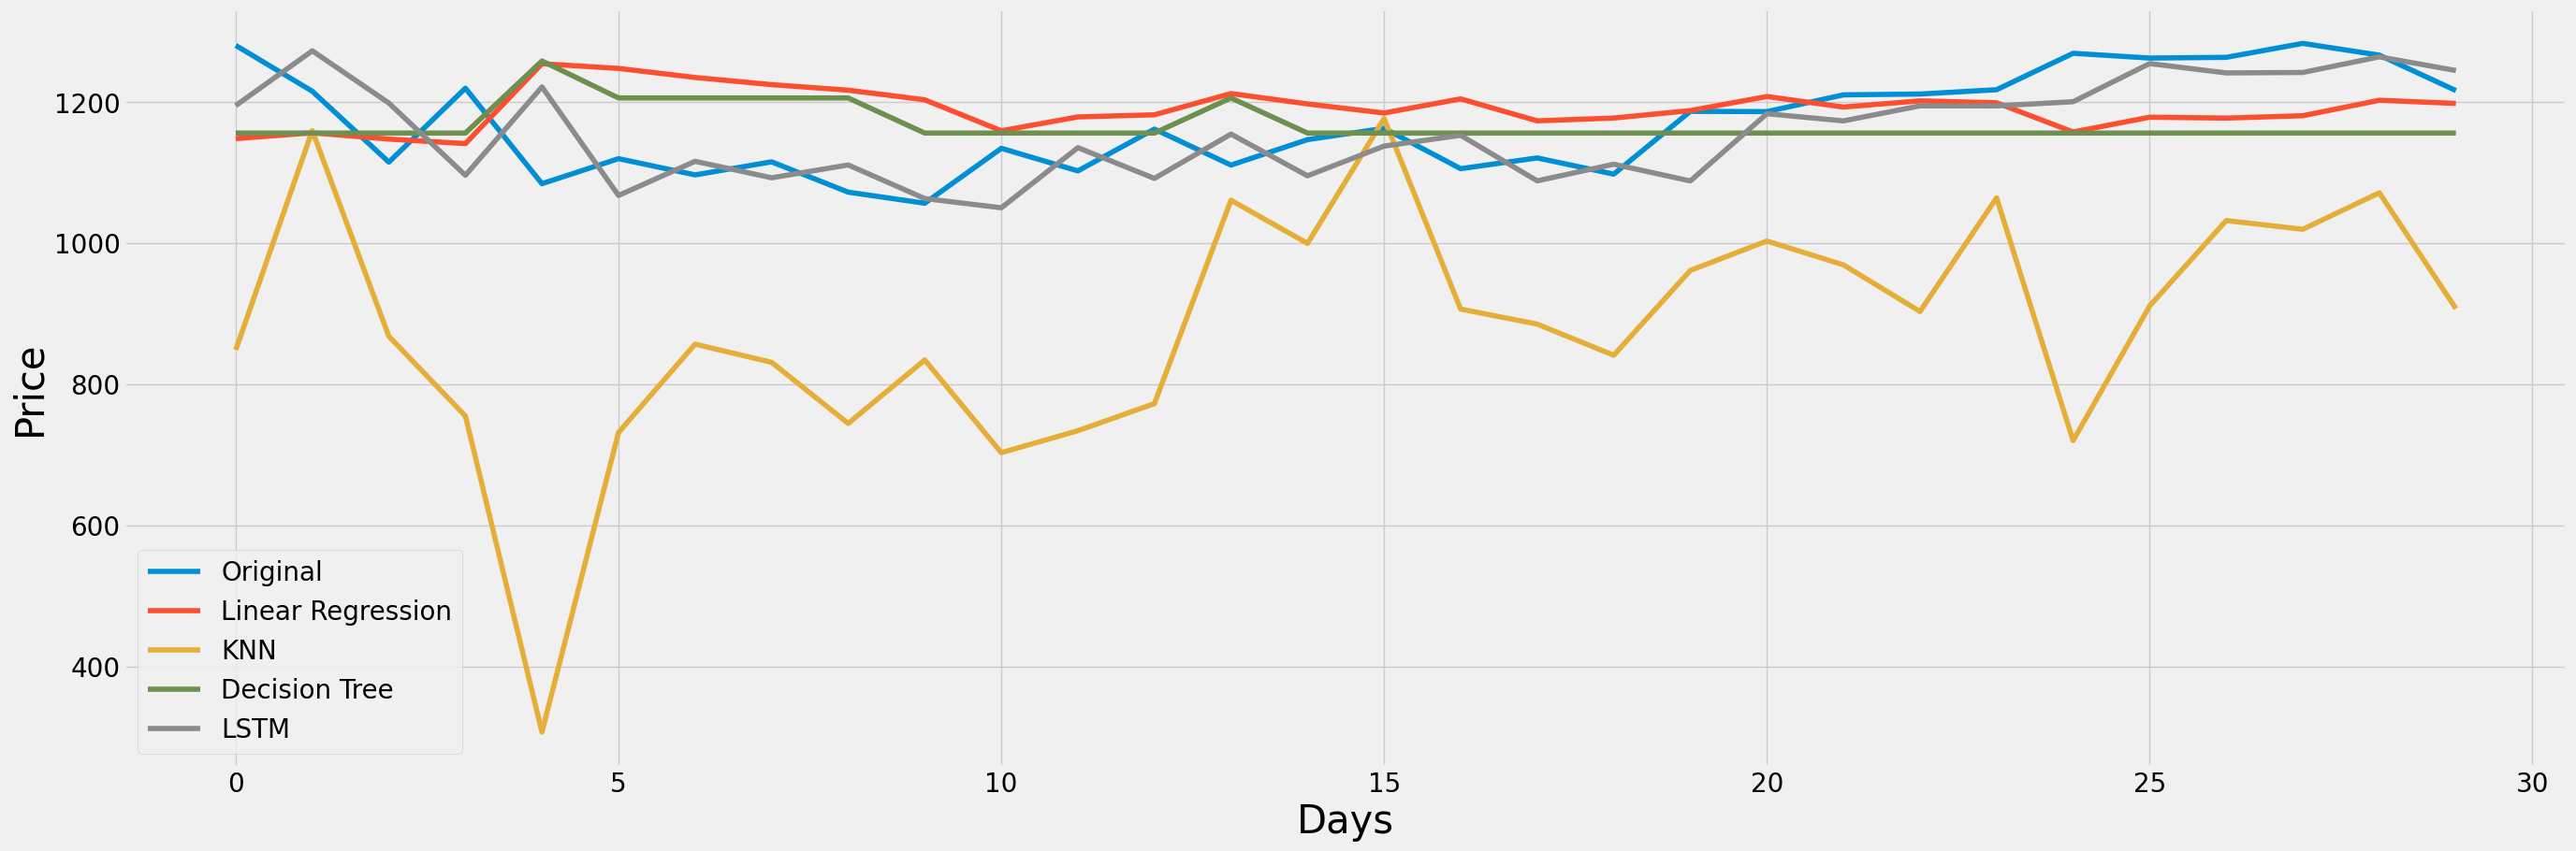

In [ ]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show()


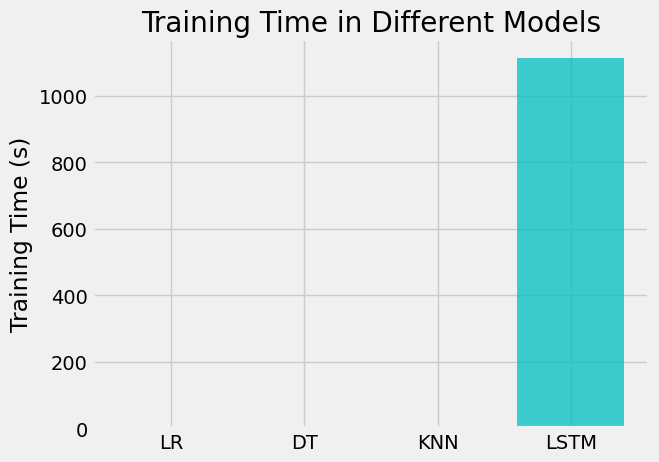

In [ ]:
objects = ('LR', 'DT', 'KNN', 'LSTM')
y_pos = np.arange(len(objects))
performance = [time_lr, time_dt, time_knn, total_lstm]

plt.bar(y_pos, performance, align='center', color='c', alpha = 0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Training Time (s)')
plt.title('Training Time in Different Models')

plt.show()

In [ ]:
date= ['2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
        '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]

In [ ]:
days = [str(i) for i in date]

predictions = {'Original':original[10:41],
               'Linear Regression':lr.predict(X_old)[10:41],
              'KNN':knn.predict(X_old)[10:41],
              'Decision Tree':tree.predict(X_old)[10:41],
              'LSTM':lstm[10:41]}

predictions = pd.DataFrame(predictions)
print(days)
len(days)

['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28']


30

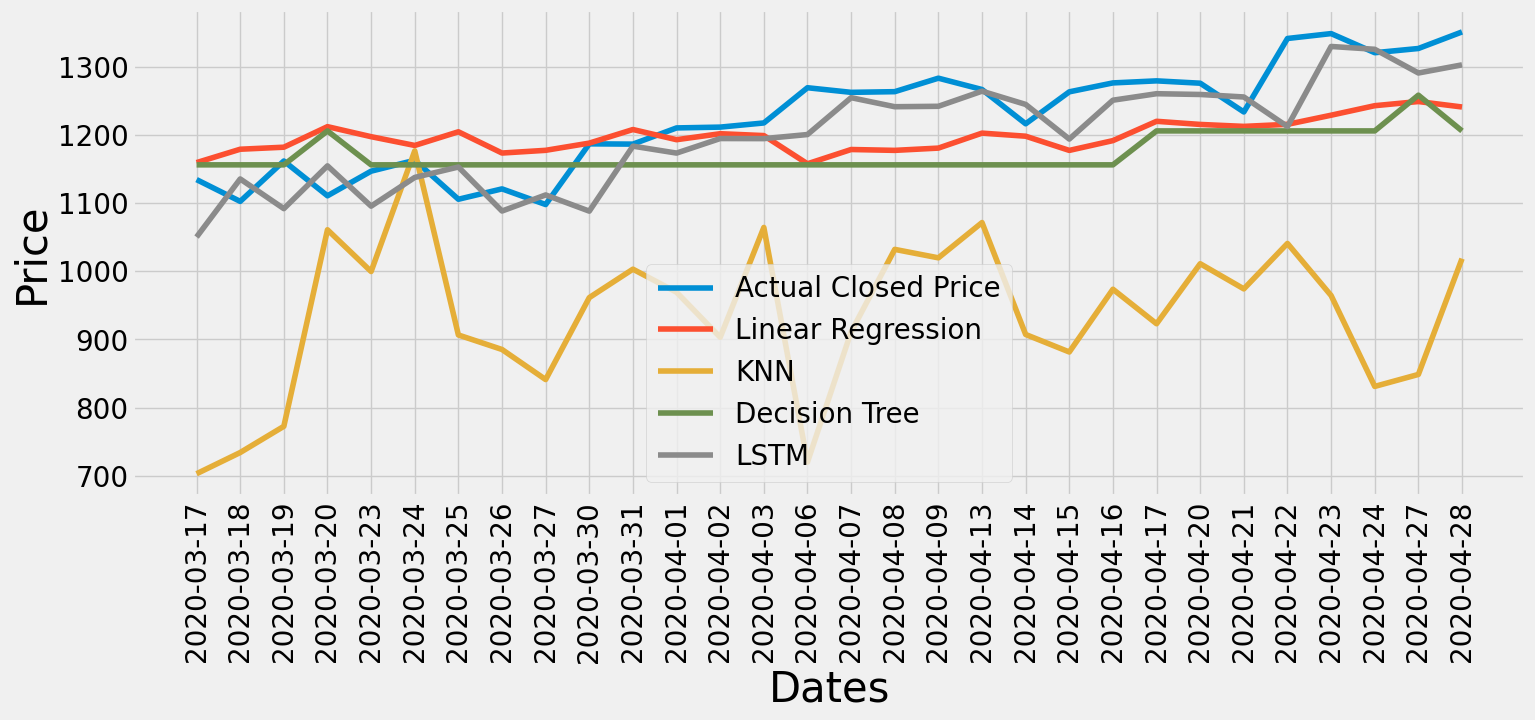

<Figure size 640x480 with 0 Axes>

In [ ]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Actual Closed Price','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)

bars = days
y_pos = np.arange(len(bars))

# Create names
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)


plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Price', fontsize = 30)


fig = plt.gcf()
fig.set_size_inches(16,6)


plt.show()

plt.savefig("High resoltion.png",dpi=300)